<a href="https://colab.research.google.com/github/BDouchet/Forecasting-Air-Pollutant-Concentration-in-Lille/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import datas

**(The dataset is not shareable)**

A mix between [Atmo Hauts-de-France](https://www.atmo-hdf.fr/) and [OpenWeatherMap](https://openweathermap.org/).


In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1JlxPehxIRvNuuS9I9IMy_UTgpfdjr66O'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('last.csv')
df=pd.read_csv('last.csv',index_col='date_fin')
df.index=pd.to_datetime(df.index)

df

,PM10,O3,NO2,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all
date_fin,,,,,,,,,,
2013-01-01 01:00:00+01:00,7.0,66.500,7.8,281.48,1001,90,8.7,210,0.00,75
2013-01-01 02:00:00+01:00,6.3,64.935,8.5,281.33,1001,92,8.2,210,1.00,90
2013-01-01 03:00:00+01:00,5.0,62.493,9.8,281.34,1001,92,7.2,220,0.46,90
2013-01-01 04:00:00+01:00,5.3,58.275,8.3,281.29,1001,92,6.7,210,0.00,90
2013-01-01 05:00:00+01:00,4.8,57.720,8.3,281.28,1000,92,7.2,210,0.00,90
...,...,...,...,...,...,...,...,...,...,...
2020-10-04 20:00:00+02:00,10.3,54.000,10.8,283.97,991,81,7.7,180,17.02,0
2020-10-04 21:00:00+02:00,5.4,57.200,13.1,283.97,991,81,6.7,180,0.00,90
2020-10-04 22:00:00+02:00,3.3,51.100,11.7,284.10,991,71,7.7,180,0.00,100


In [4]:
df.describe()

,PM10,O3,NO2,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all
count,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000,68015.000000
mean,21.150784,49.711981,24.137374,284.569270,1015.579960,76.699963,4.185021,182.161303,0.110701,61.370359
std,13.787780,28.744077,15.367965,6.606848,9.756722,17.023742,2.407505,98.677677,0.751535,34.919757
min,-1.200000,-1.443000,0.000000,263.000000,970.000000,18.000000,0.050000,0.000000,0.000000,0.000000
25%,11.900000,29.150000,12.400000,279.670000,1010.000000,66.000000,2.570000,100.000000,0.000000,29.000000
50%,17.700000,49.950000,20.480000,284.320000,1016.000000,81.000000,3.600000,200.000000,0.000000,75.000000
75%,26.500000,68.200000,32.500000,289.190000,1022.000000,92.000000,5.660000,250.000000,0.000000,90.000000
max,316.800000,216.783000,109.700000,313.610000,1048.000000,100.000000,19.600000,360.000000,46.990000,100.000000


# Data Analysis

## Correlation Matrix

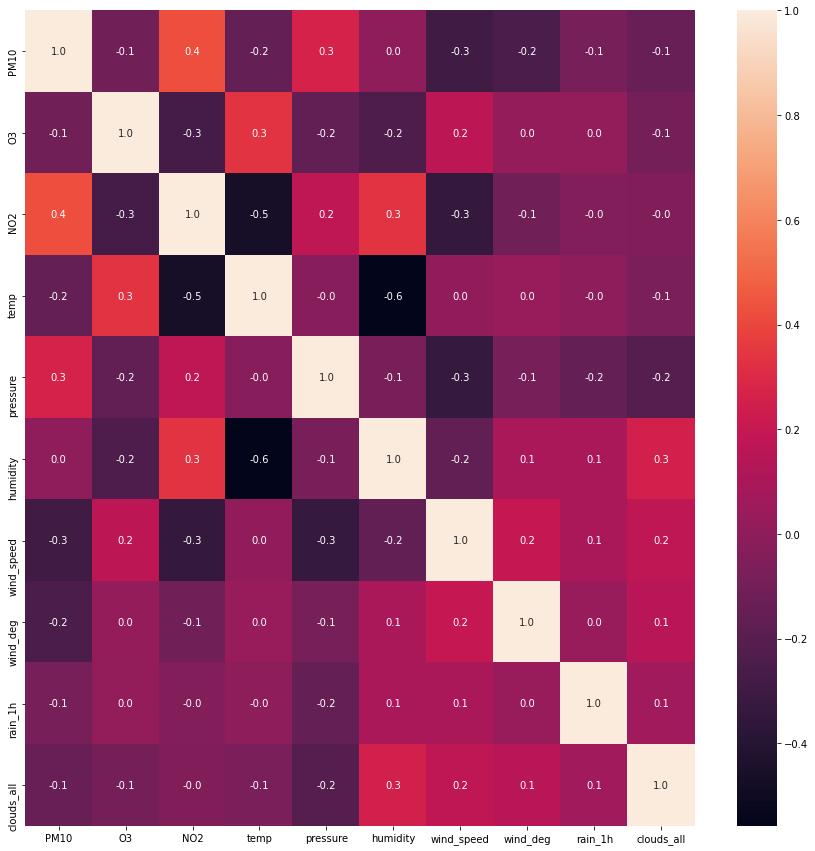

In [5]:
df_corr=df.corr()
#print(df_corr['PM10'])
#print(df_corr['NO2'])
#print(df_corr['O3'])
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sn.heatmap(df_corr,annot=True,fmt=".1f")
plt.show()

## PCA

[0.24687061 0.18557772 0.10256429 0.09056336 0.08376513 0.07982397
 0.0749588  0.06176918 0.04442144 0.02968549]


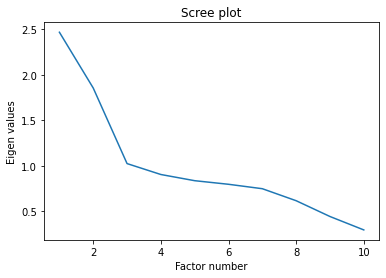

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
sc=StandardScaler()
df_ft=sc.fit_transform(df)
pca=PCA(svd_solver='full')
coord=pca.fit_transform(df_ft)
n=len(df)
eigval = (n-1)/n*pca.explained_variance_
print(pca.explained_variance_ratio_)
p=pca.n_components_
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [ ]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.468706  2.928968
1    1.855777  1.928968
2    1.025643  1.428968
3    0.905634  1.095635
4    0.837651  0.845635
5    0.798240  0.645635
6    0.749588  0.478968
7    0.617692  0.336111
8    0.444214  0.211111
9    0.296855  0.100000


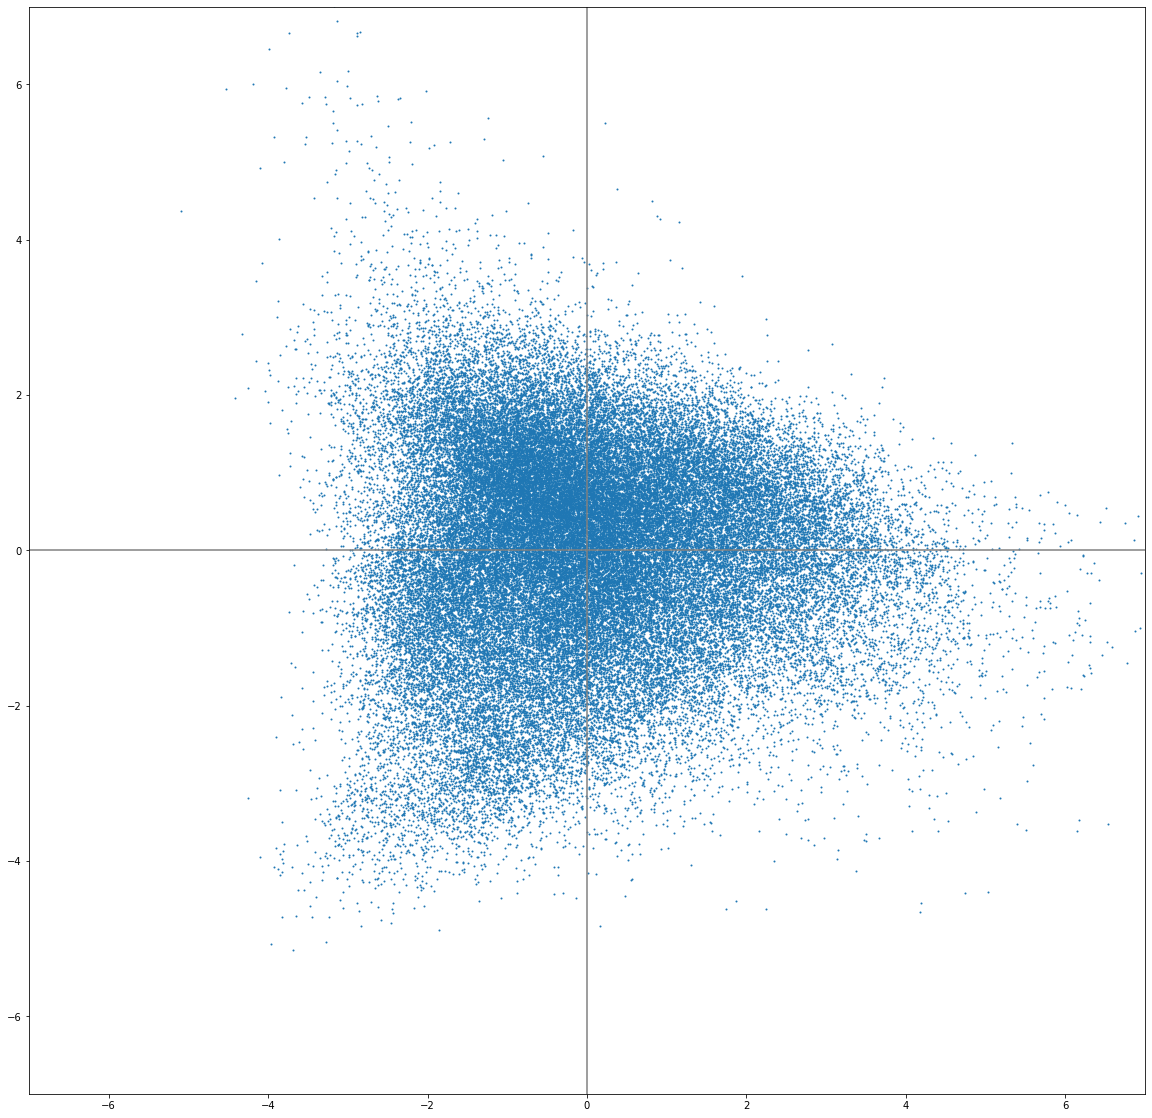

In [ ]:
X=[coord[i,0] for i in range(n)]
Y=[coord[i,1] for i in range(n)]
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-7,7)
axes.set_ylim(-7,7)
plt.plot([-7,7],[0,0],color='grey')
plt.plot([0,0],[-7,7],color='grey')
plt.scatter(X,Y,s=1)
plt.show()

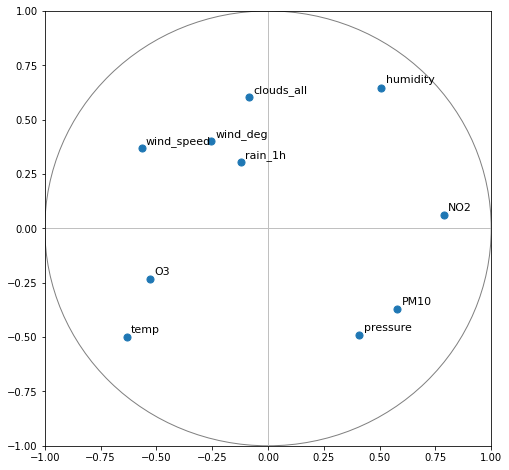

In [ ]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.scatter(corvar[:,0],corvar[:,1],s=50)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0]+0.02,corvar[j,1]+0.02),fontsize=11)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='grey',fill=False)
axes.add_artist(cercle)
plt.show()

## Values Display

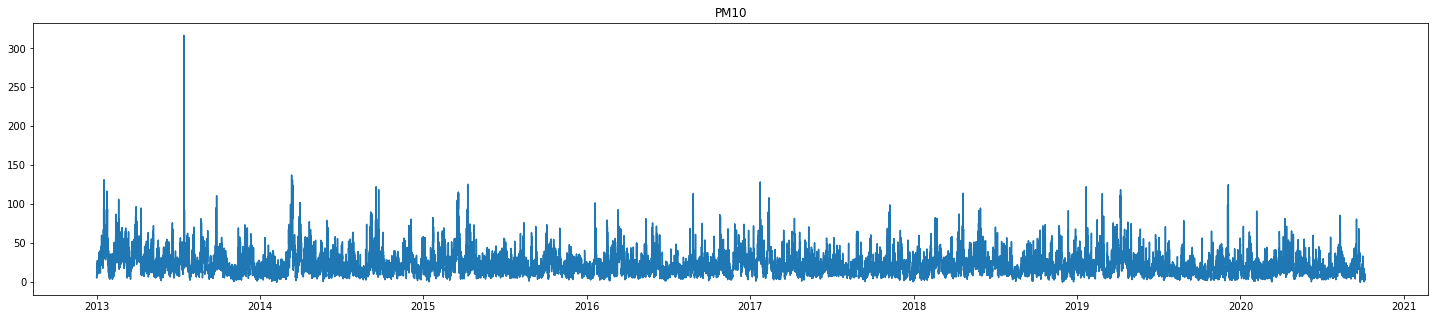

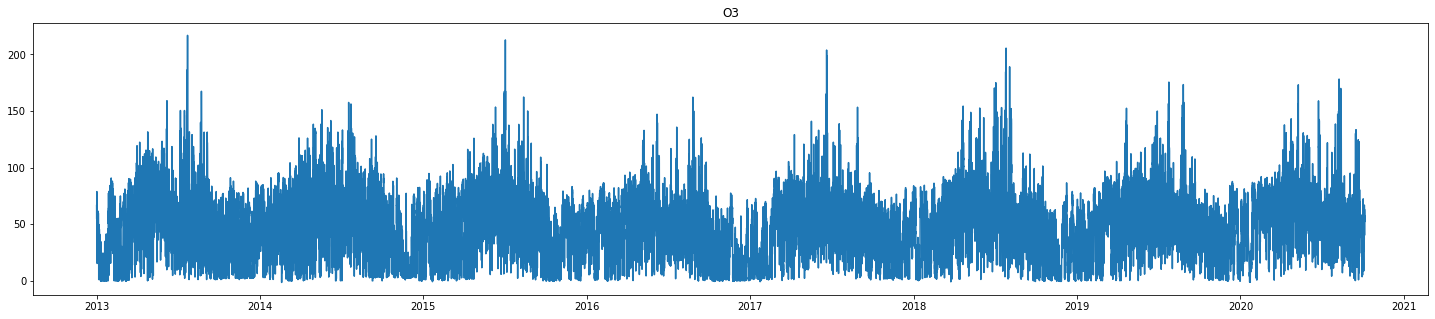

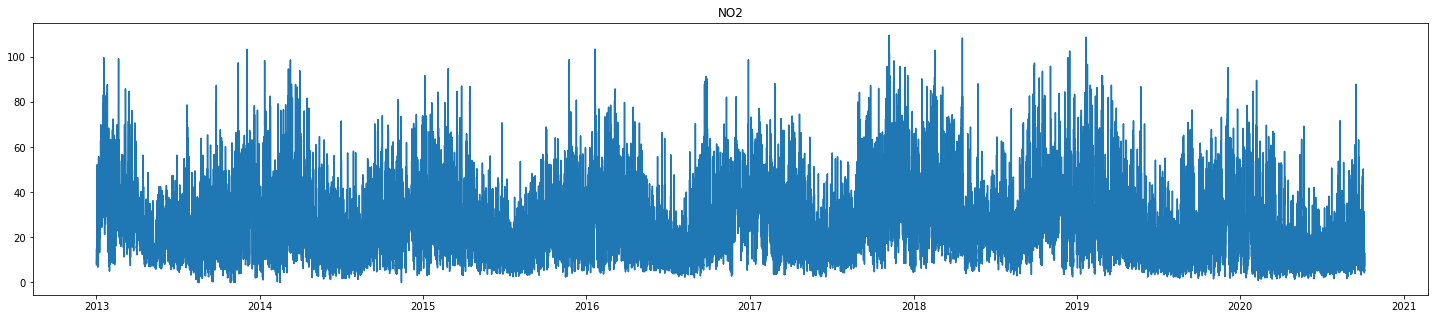

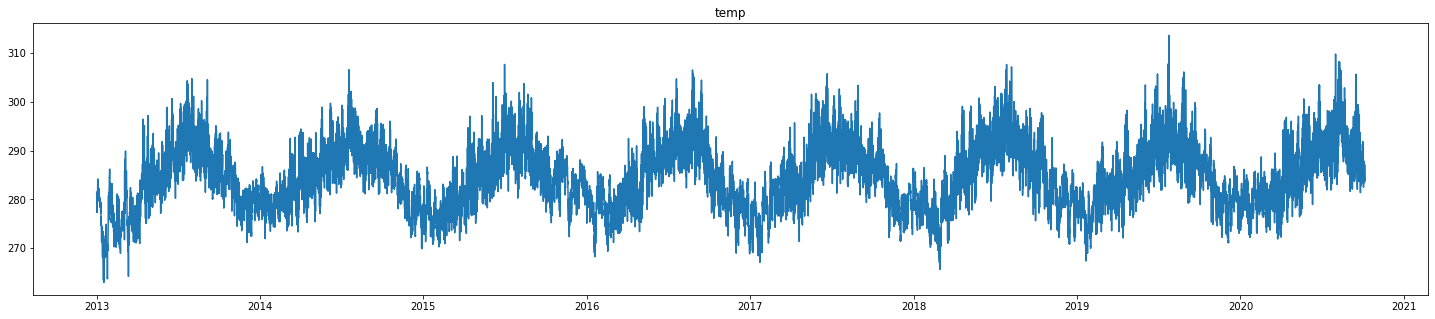

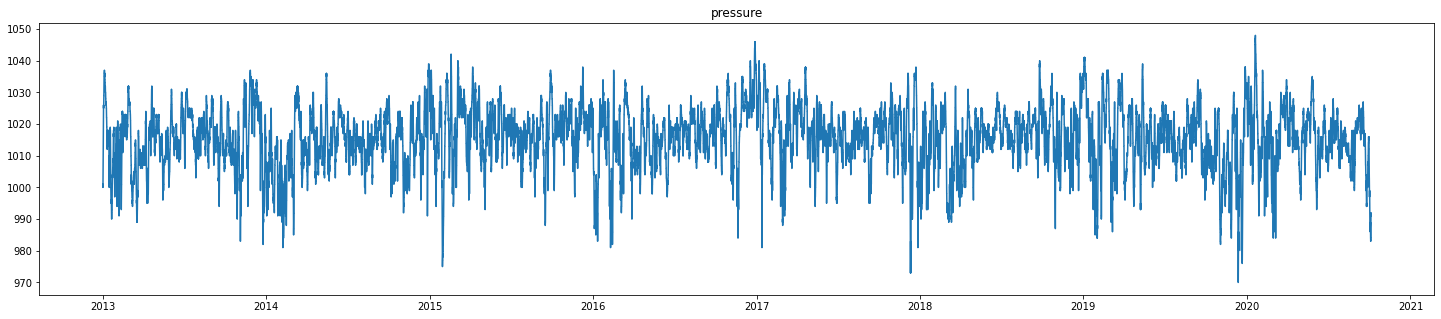

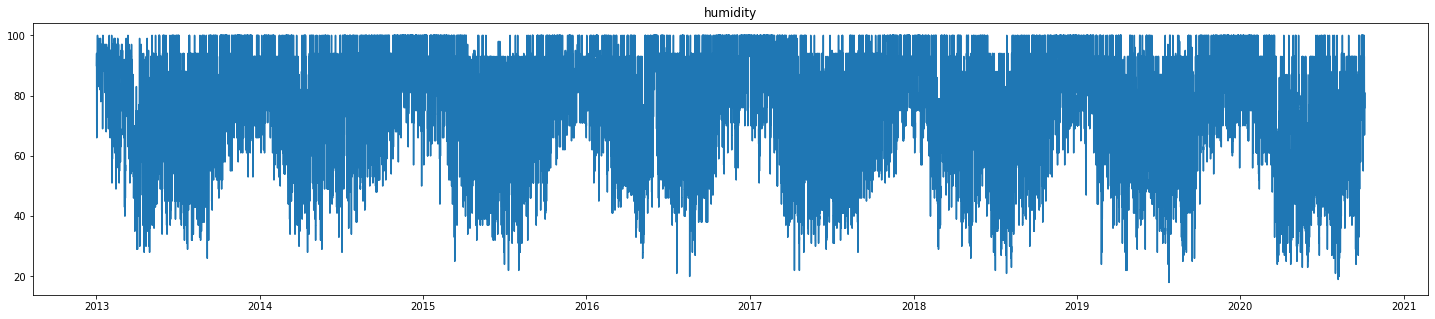

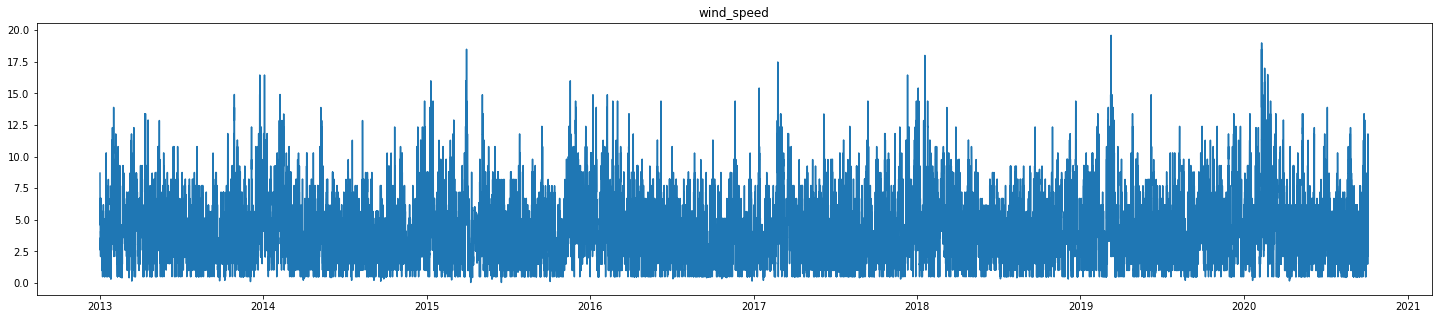

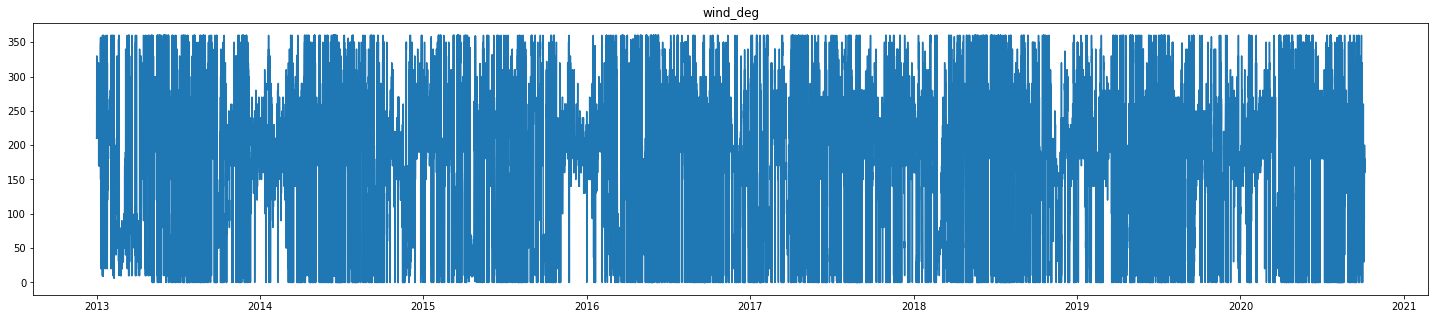

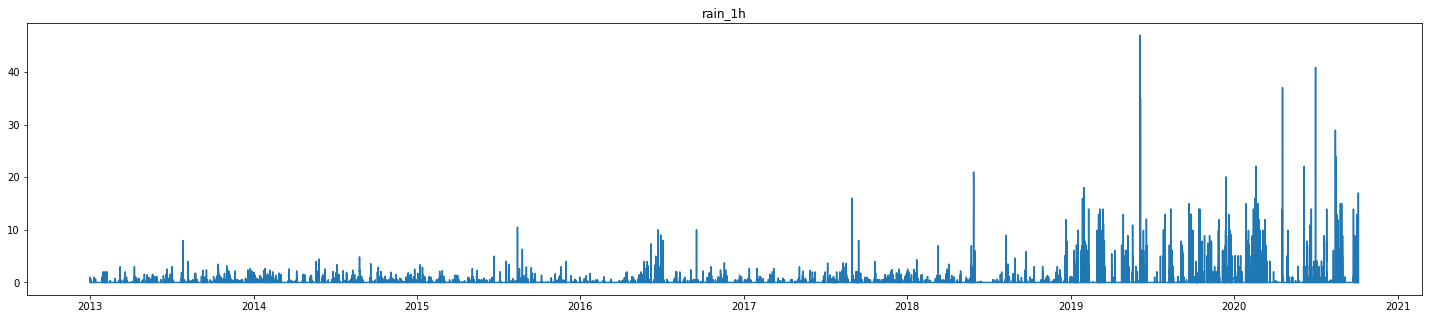

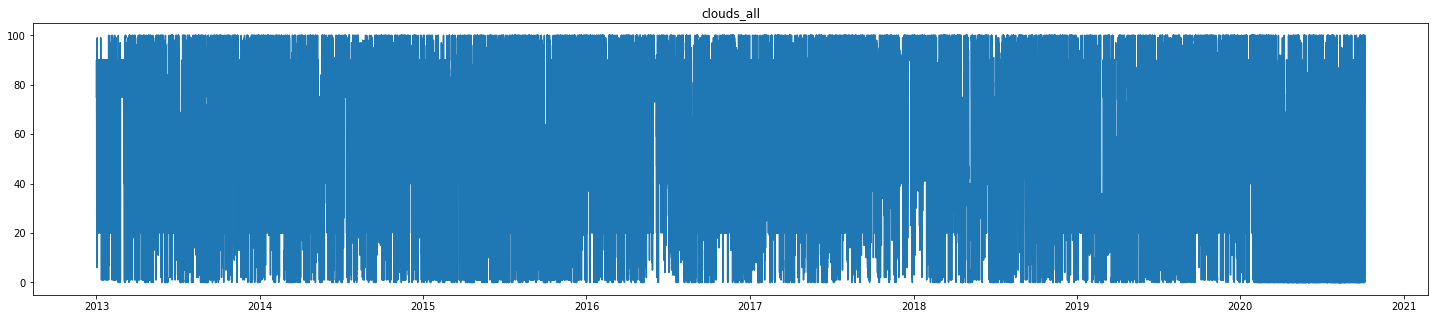

In [6]:
for col in df.columns:
    plt.figure(figsize=(25,5))
    plt.plot(df.index,df[col])
    plt.title(col)
    plt.show()


## Auto correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


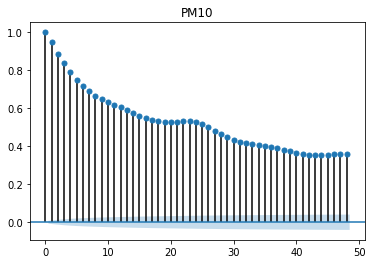

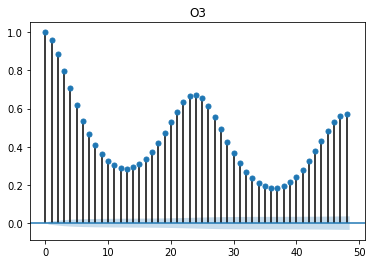

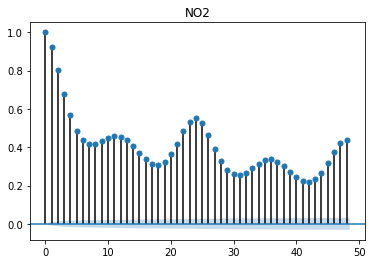

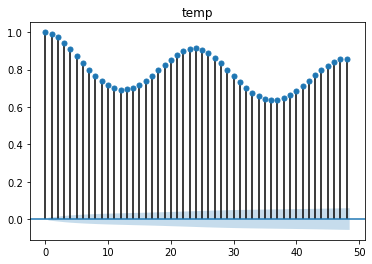

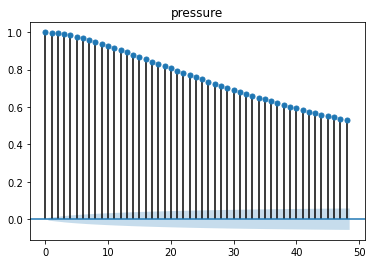

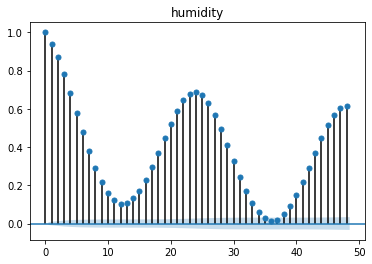

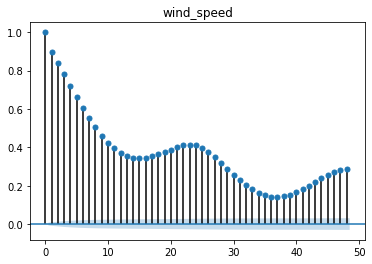

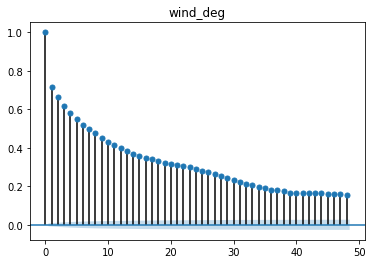

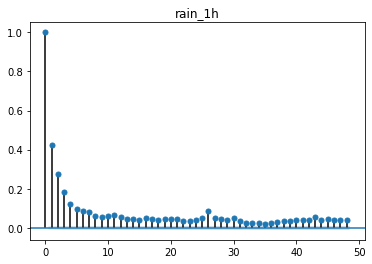

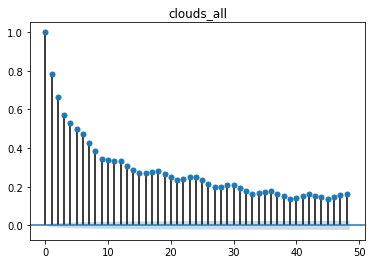

In [7]:
from statsmodels.graphics import tsaplots

# d: 24, w: 168, m: 720, y: 8760, 5y:43800

for col isitle(col)
    plt.show()
